# Step 1: Load and Explore the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display full text in columns
pd.set_option('display.max_colwidth', None)

# Load the data
train_df = pd.read_csv("/content/train.csv", encoding='ISO-8859-1')
test_df = pd.read_csv("/content/test.csv", encoding='ISO-8859-1')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

print("\n-------------------------------------------------\n")

# View column names and data types
print("\nTrain Info:")
train_df.info()

print("\n-------------------------------------------------\n")

# Preview sample rows
train_df.head()


Train shape: (27481, 10)
Test shape: (4815, 9)

-------------------------------------------------


Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB

-------------------------------------------------



,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


**Dropping Irrevelant columns**

Columns:

textID: Identifier — Drop (not useful for prediction).

text: Full tweet — Keep (main input feature).

selected_text: Selected portion conveying sentiment — Keep (used in model training).

sentiment: Sentiment label — Keep (target for classification).

Time of Tweet: Time when the tweet was made — 🗑 Drop (not useful for content-based sentiment).

Age of User: Age of the user — Unreliable/irrelevant for tweet content — Drop.

Country: Country of user — Might bias or be missing — Drop.

Population -2020, Land Area (Km²), Density (P/Km²): Geographical data — Drop (not affecting tweet content).

In [ ]:
# Drop irrelevant columns
drop_cols = ['textID', 'Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

print("Remaining Columns:", train_df.columns.tolist())
train_df.head(10)


Remaining Columns: ['text', 'selected_text', 'sentiment']


,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative
5,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,neutral
6,2am feedings for the baby are fun when he is all smiles and coos,fun,positive
7,Soooo high,Soooo high,neutral
8,Both of you,Both of you,neutral
9,Journey!? Wow... u just became cooler. hehe... (is that possible!?),Wow... u just became cooler.,positive


# Null values checking and dropping rows

In [ ]:
print("Null values in training set:\n", train_df.isnull().sum())
print("\nNull values in test set:\n", test_df.isnull().sum())

Null values in training set:
 text             1
selected_text    1
sentiment        0
dtype: int64

Null values in test set:
 text         1281
sentiment    1281
dtype: int64


In [ ]:
train_df.dropna(subset=['text', 'sentiment'], inplace=True)
test_df.dropna(subset=['text', 'sentiment'], inplace=True)


In [ ]:
print("Train set nulls:")
print(train_df.isnull().sum())

print("\nTest set nulls:")
print(test_df.isnull().sum())

Train set nulls:
text             0
selected_text    0
sentiment        0
dtype: int64

Test set nulls:
text         0
sentiment    0
dtype: int64


# Sentiment Distribution


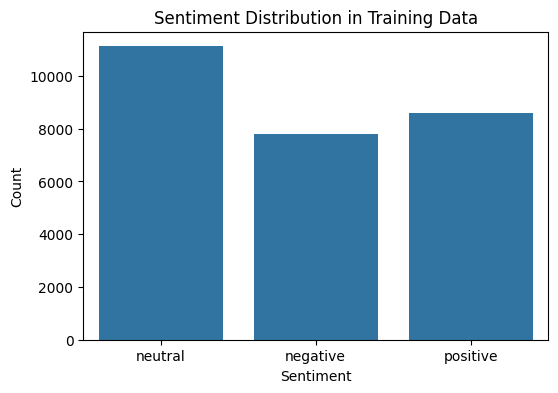

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment count
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='sentiment')
plt.title("Sentiment Distribution in Training Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


# Text length Distribution

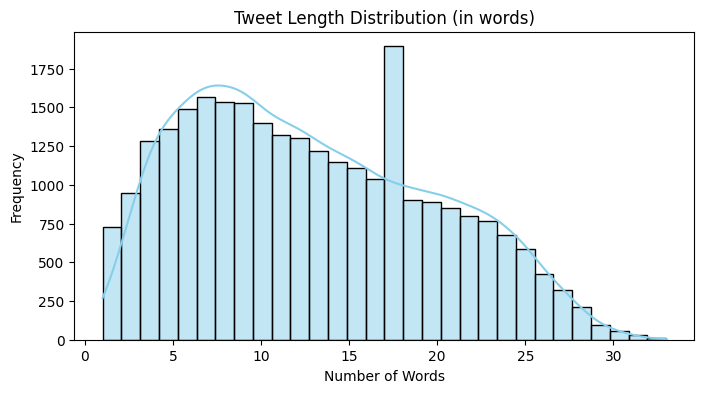

In [ ]:
# Add a column for text length
train_df["text_length"] = train_df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,4))
sns.histplot(train_df["text_length"], bins=30, kde=True, color='skyblue')
plt.title("Tweet Length Distribution (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


Plotting test dataframe

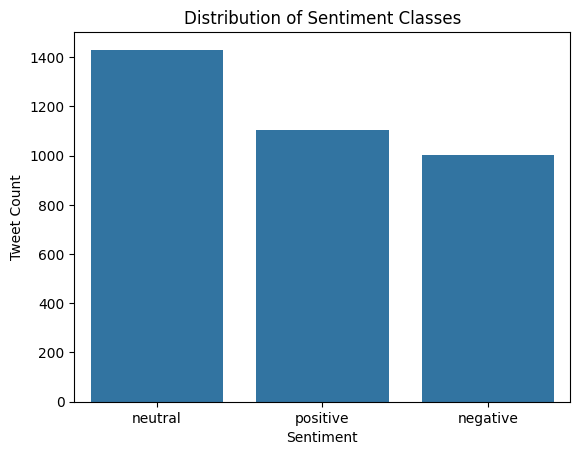

In [ ]:
sns.countplot(data=test_df, x='sentiment')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

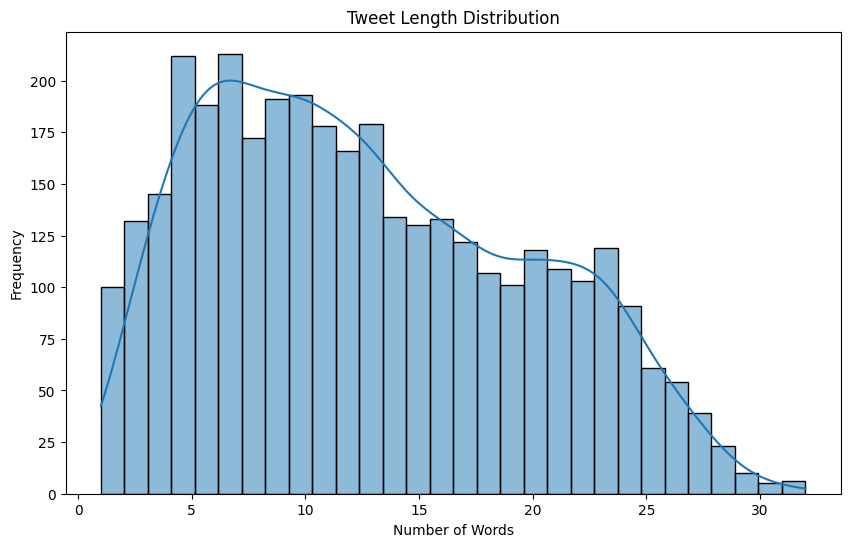

In [ ]:
test_df['text_length'] = test_df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,6))
sns.histplot(data=test_df, x='text_length', bins=30, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Step 2: Text Cleaning and Preprocessing

**2.1 Preprocessing Functions**
**We'll implement the following:**

**Lowercasing**

**Remove URLs, mentions, emojis, punctuation, non-ASCII characters**

**Hashtag cleanup (remove #, keep word)**

**Tokenization**

**Stopword removal**

**Lemmatization**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
tokenizer = TweetTokenizer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs and mentions
    text = re.sub(r"http\S+|www.\S+", "", text)  # URLs
    text = re.sub(r"@\w+", "", text)             # Mentions

    # 3. Remove hashtags symbol but keep words
    text = re.sub(r"#", "", text)

    # 4. Remove emojis & non-ASCII
    text = text.encode("ascii", "ignore").decode()

    # 5. Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # 6. Tokenization
    tokens = tokenizer.tokenize(text)

    # 7. Remove stopwords
    tokens = [t for t in tokens if t not in stop_words]

    # 8. Lemmatization
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return " ".join(tokens)


In [ ]:
# Apply preprocessing to train and test
train_df['clean_text'] = train_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

# Preview cleaned text
train_df[['text', 'clean_text']].head(10)


,text,clean_text
0,"I`d have responded, if I were going",id responded going
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad miss san diego
2,my boss is bullying me...,bos bullying
3,what interview! leave me alone,interview leave alone
4,"Sons of ****, why couldn`t they put them on the releases we already bought",son couldnt put release already bought
5,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,shameless plugging best ranger forum earth
6,2am feedings for the baby are fun when he is all smiles and coos,2am feeding baby fun smile coo
7,Soooo high,soooo high
8,Both of you,
9,Journey!? Wow... u just became cooler. hehe... (is that possible!?),journey wow u became cooler hehe possible


**Visualizing word count after cleaning**

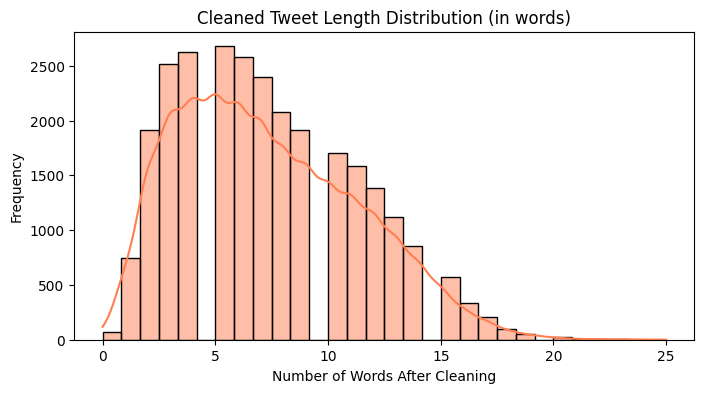

In [ ]:
# Word count after cleaning
train_df["clean_length"] = train_df["clean_text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,4))
sns.histplot(train_df["clean_length"], bins=30, kde=True, color='coral')
plt.title("Cleaned Tweet Length Distribution (in words)")
plt.xlabel("Number of Words After Cleaning")
plt.ylabel("Frequency")
plt.show()


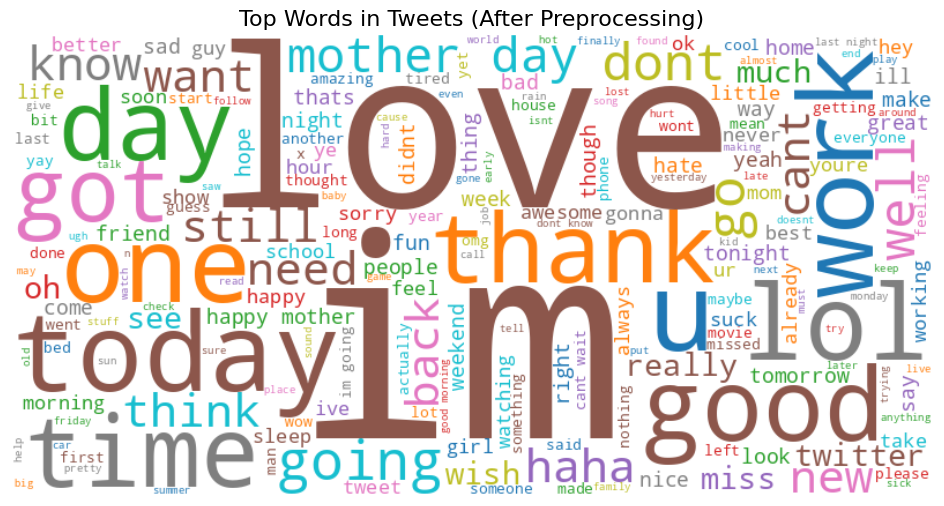

In [ ]:
from wordcloud import WordCloud

# Combine all cleaned text
all_words = " ".join(train_df['clean_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate(all_words)

# Plot word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words in Tweets (After Preprocessing)", fontsize=16)
plt.show()


# Step 3: Feature Extraction for Machine Learning Models (TF-IDF)?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# Apply TF-IDF Vectorization**

In [ ]:

# Vectorize with TF-IDF (unigram + bigram)
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X = tfidf.fit_transform(train_df['clean_text'])

print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (27480, 10000)


**Encode Target and split Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target
y = train_df['sentiment']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)


Train size: (21984, 10000)
Validation size: (5496, 10000)


**Visualize TF-IDF feature**

<ipython-input-18-610492dc1669>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette="viridis")


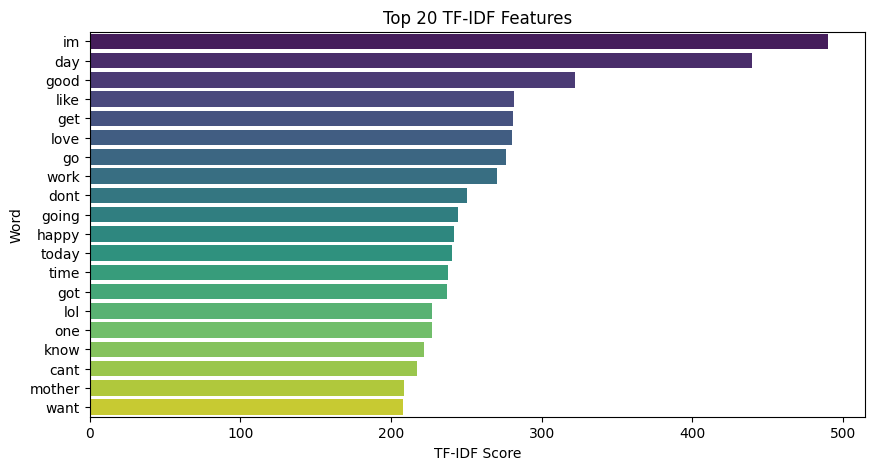

In [ ]:
import numpy as np
import seaborn as sns

# Sum of TF-IDF for each word across all documents
feature_array = np.array(tfidf.get_feature_names_out())
tfidf_sum = X.sum(axis=0).A1
sorted_indices = np.argsort(tfidf_sum)[::-1][:20]

# Top 20 words and scores
top_words = feature_array[sorted_indices]
top_scores = tfidf_sum[sorted_indices]

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_scores, y=top_words, palette="viridis")
plt.title("Top 20 TF-IDF Features")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.show()


# Step 4: Model Training and Evaluation with SVM and Logistic Regression?

**We’ll train two models:**

**Logistic Regression**

**Random Forest**

Logistic Regression Accuracy: 0.6850

Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.59      0.65      1556
     neutral       0.61      0.76      0.68      2223
    positive       0.78      0.68      0.73      1717

    accuracy                           0.69      5496
   macro avg       0.71      0.68      0.69      5496
weighted avg       0.70      0.69      0.69      5496



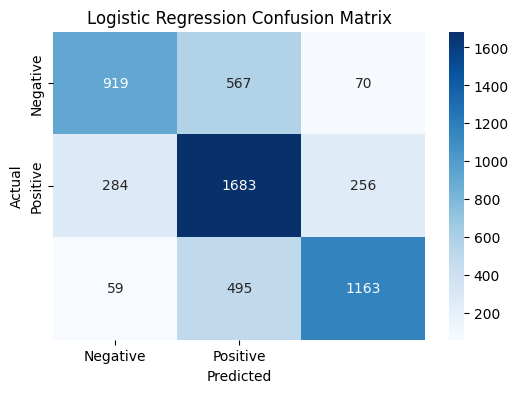

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Logistic Regression Model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predict on validation data
y_pred_lr = lr.predict(X_val)

# Accuracy and Evaluation
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_val, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest Accuracy: 0.6887

Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.60      0.65      1556
     neutral       0.63      0.72      0.67      2223
    positive       0.75      0.73      0.74      1717

    accuracy                           0.69      5496
   macro avg       0.70      0.68      0.69      5496
weighted avg       0.69      0.69      0.69      5496



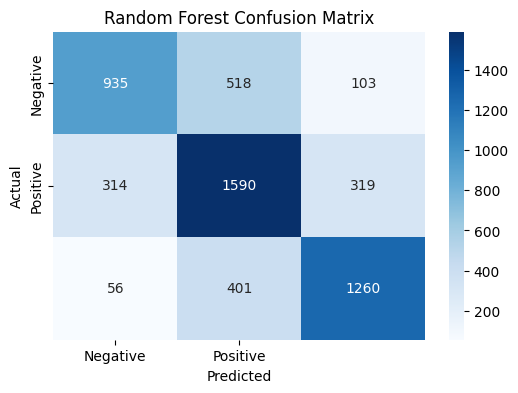

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict on validation data
y_pred_rf = rf.predict(X_val)

# Accuracy and Evaluation
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
def predict_sentiment_by_index(index, model, df, vectorizer):
    if index >= len(df):
        print("Index out of range.")
        return

    text = df.iloc[index]['clean_text']
    true_sentiment = df.iloc[index]['sentiment']

    vectorized_text = vectorizer.transform([text])
    prediction = model.predict(vectorized_text)[0]
    print(f"Input Text: {text}")
    print(f"Actual Sentiment: {true_sentiment}")
    print(f"Predicted Sentiment: {prediction}")



In [ ]:
predict_sentiment_by_index(999, lr, train_df, tfidf)


Input Text: taking care yucky stuff
Actual Sentiment: negative
Predicted Sentiment: negative


In [ ]:
def predict_sentiment_by_text(text, model, vectorizer):
    vectorized_text = vectorizer.transform([text])
    prediction = model.predict(vectorized_text)[0]
    print(f"Input Text: {text}")
    print(f"Predicted Sentiment: {prediction}")


In [ ]:
predict_sentiment_by_text("I hate this shit.", lr, tfidf)

Input Text: I hate this shit.
Predicted Sentiment: negative


# Step 6: Build and Train the LSTM Model

**5.1 Tokenize the Text Data and Padding Sequences**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
vocab_size = 10000
max_len = 100

# Tokenize
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['clean_text'])

X_seq = tokenizer.texts_to_sequences(train_df['clean_text'])
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post', truncating='post')

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train_df['sentiment'])

# Train-test split
X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_pad, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


**6.1 Build the LSTM Model**

In [ ]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



**6.2 Compile the Model**

In [ ]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**6.3 Train the Model**

In [ ]:
# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_val_lstm, y_val_lstm),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/10
687/687 - 253s - 369ms/step - accuracy: 0.4163 - loss: -9.0521e+01 - val_accuracy: 0.4463 - val_loss: -4.0197e+02
Epoch 2/10
687/687 - 253s - 369ms/step - accuracy: 0.4572 - loss: -1.2506e+03 - val_accuracy: 0.4702 - val_loss: -2.0722e+03
Epoch 3/10
687/687 - 258s - 376ms/step - accuracy: 0.4767 - loss: -4.0645e+03 - val_accuracy: 0.4794 - val_loss: -5.1374e+03
Epoch 4/10
687/687 - 236s - 343ms/step - accuracy: 0.4963 - loss: -8.3292e+03 - val_accuracy: 0.4796 - val_loss: -9.2551e+03
Epoch 5/10
687/687 - 265s - 386ms/step - accuracy: 0.5031 - loss: -1.3833e+04 - val_accuracy: 0.4796 - val_loss: -1.4009e+04
Epoch 6/10
687/687 - 260s - 378ms/step - accuracy: 0.5012 - loss: -2.0359e+04 - val_accuracy: 0.4791 - val_loss: -1.9668e+04
Epoch 7/10
687/687 - 263s - 382ms/step - accuracy: 0.5146 - loss: -2.8138e+04 - val_accuracy: 0.4778 - val_loss: -2.5384e+04
Epoch 8/10
687/687 - 262s - 381ms/step - accuracy: 0.5178 - loss: -3.6909e+04 - val_accuracy: 0.4782 - val_loss: -3.2219e+04


**Step 7: Evaluation of the LSTM**

In [ ]:
loss, acc = model_lstm.evaluate(X_val_lstm, y_val_lstm)
print(f"LSTM Accuracy: {acc:.4f}")

172/172 ━━━━━━━━━━━━━━━━━━━━ 18s 106ms/step - accuracy: 0.4746 - loss: -45586.8828
LSTM Accuracy: 0.4803


# Plot Training History

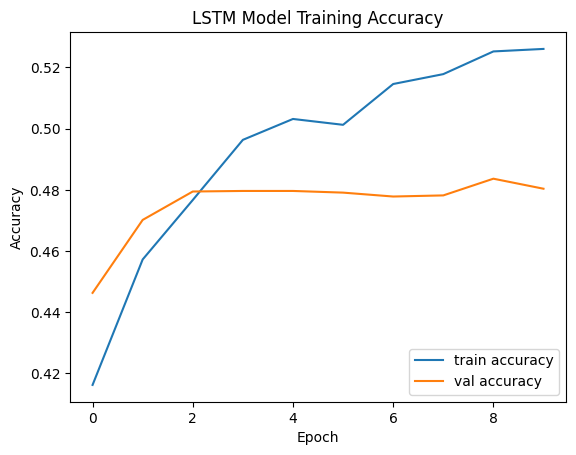

In [ ]:
# Plot training & validation accuracy for GRU
plt.plot(history_lstm.history['accuracy'], label='train accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('LSTM Model Training Accuracy')
plt.show()


# Predict on Custom Input